In [2]:
!pip install tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tabulate import tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [3]:
with open('output/gas_used_avg.txt', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data, columns=['Date', 'Average gas used each month'])
df['Average gas used each month'] = df['Average gas used each month'].astype(float).round(2)


In [4]:
# Sort by Year and Month
df_sorted = df.sort_values(by="Date", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

# Store the results as CSV (easier to interpret for later reference)
# df_sorted.to_csv("output/gas_used_avg.csv", index=False)

df_sorted.head()


,Date,Average gas used each month
22,08/2015,364774.44
26,09/2015,607479.37
30,10/2015,1064341.62
34,11/2015,552664.14
38,12/2015,445948.35


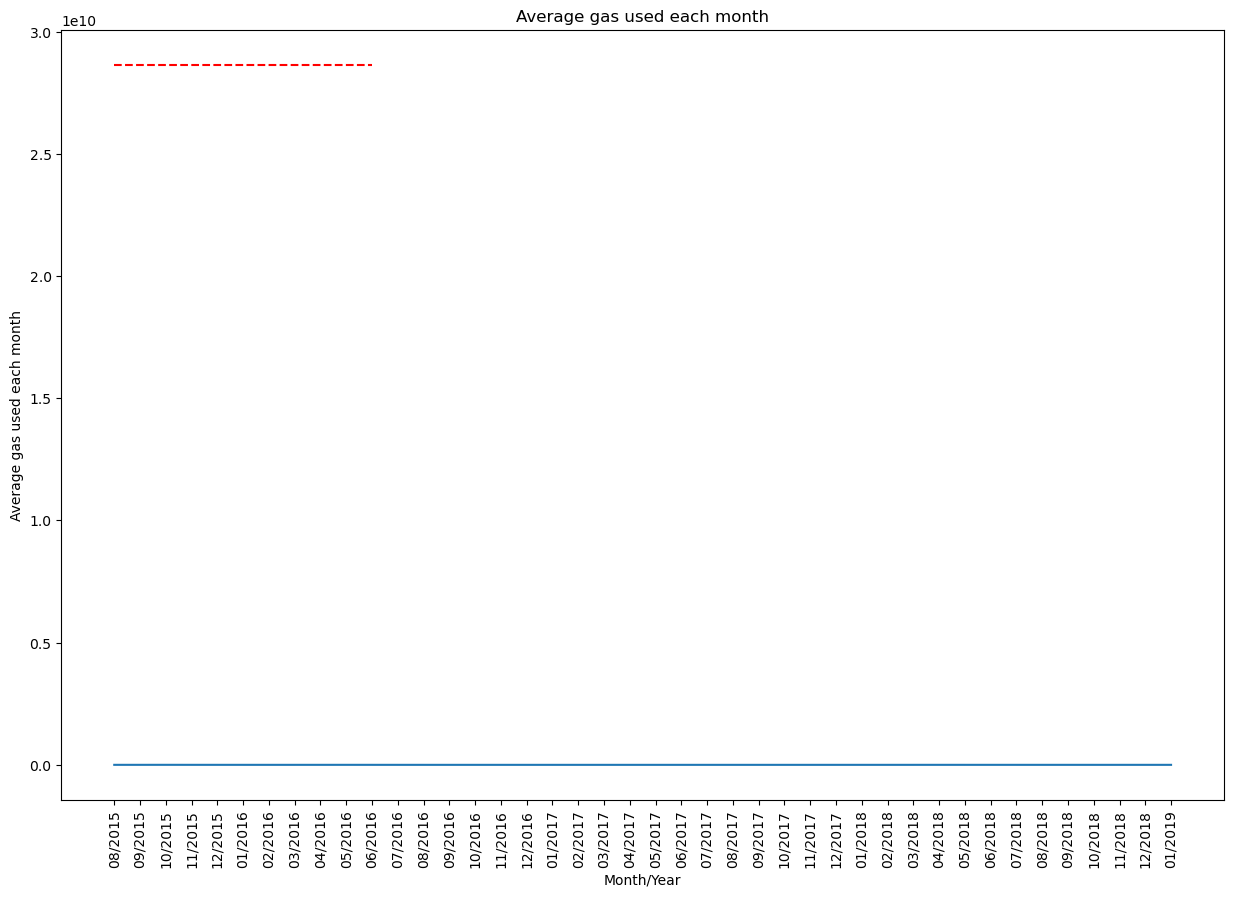

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_sorted["Date"], df_sorted["Average gas used each month"])
ax.set_xlabel("Month/Year")
ax.set_ylabel("Average gas used each month")
ax.set_title("Average gas used each month")
ax.hlines(y=, xmin=0, xmax=10, colors='red', linestyle='--')
plt.xticks(rotation=90)
plt.savefig('output/gas_used_avg.png',  bbox_inches='tight')
plt.show()


In [6]:
import sys

# Open a file for writing
with open('output/gas_used_avg.md', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    print(tabulate(df_sorted, headers='keys', tablefmt="github", showindex=False))
    
    # Restore stdout to its original value
    sys.stdout = sys.__stdout__
